In [15]:
using Plots
using LaTeXStrings
using Random
using Statistics
using Distributions
using Printf
using LinearAlgebra
using LaTeXStrings
using DelimitedFiles
using Flux
using ARFF
using JLD2
# Plot setup
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    fmt=:png, #trying to not have notebook be 80Mb
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [16]:
# input path to folder that holds the .jld2 
path = "Water_dimer_sd15/512_4000_1.0e-5"
#0.001
#1.0e-5
#1.0e-7

"Water_dimer_sd15/512_4000_1.0e-5"

In [17]:
# loading data in that folder
F = load_object(string(path,"/Fourier.jld2"));              # Fourier model
loss = load_object(string(path,"/loss.jld2"));              # training loss 
acceptance = load_object(string(path,"/acceptance.jld2"));  # acceptance rate
data_train = load_object(string(path,"/train.jld2"));       # training data model model used
data_test = load_object(string(path,"/test.jld2"));         # testing data from same distribution of testing set
#scaling = load_object(string(path,"/scaling.jld2"));        # Scaling so can convert back to original units

# parameters
A = [];
open(string(path,"/Parameters.txt")) do f
    lines = readlines(f)
    for l in lines
        push!(A,l)
    end
end

In [18]:
# train and testing loss
println(A[6])
println(A[7])

0.0001421467196776508        # training loss
0.0004035982671079156      # testing loss


In [19]:
println(A[12])

0.3              # scale of initial ω values


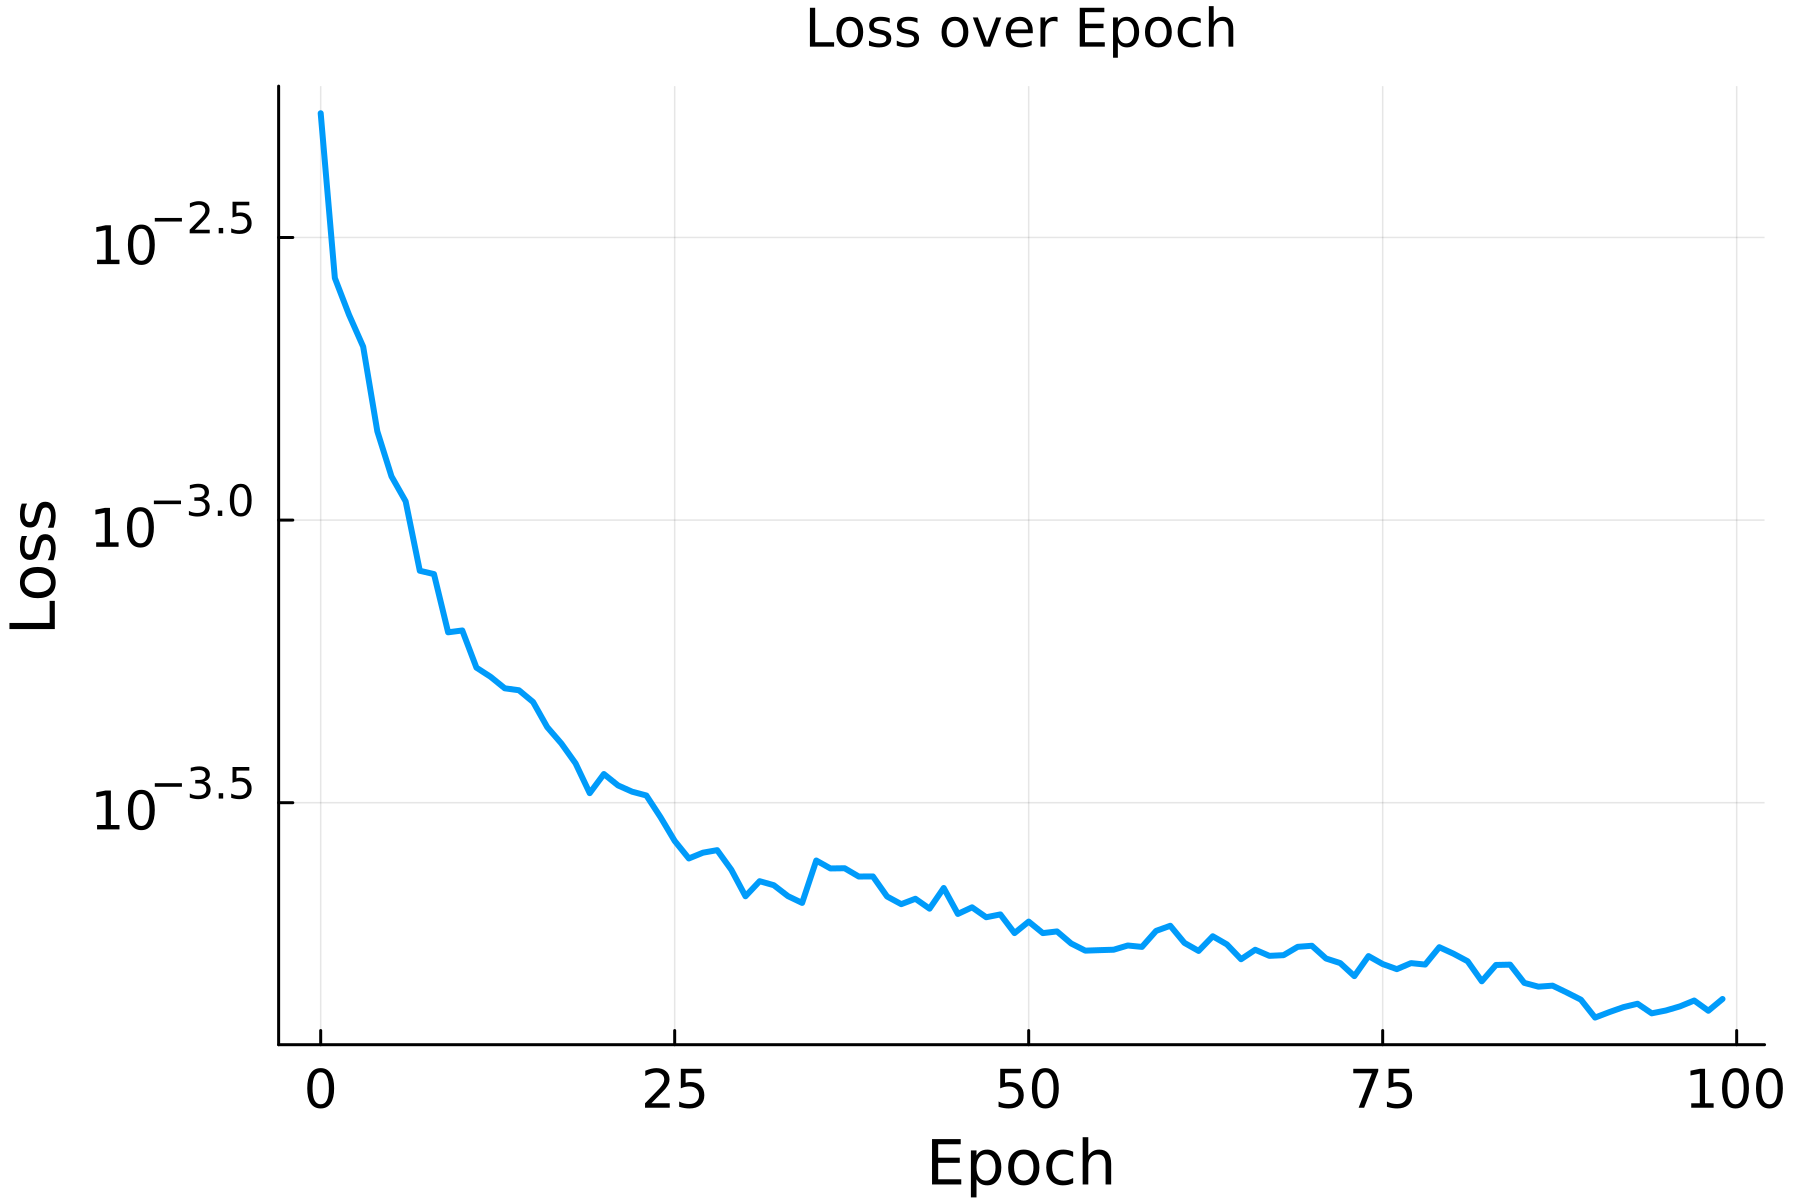

In [20]:
#Plotting Loss
t = plot(0:length(loss)-1, loss, yscale=:log10,label="",dpi=300)
title!("Loss over Epoch")
xlabel!("Epoch")
ylabel!("Loss")
#savefig(t,"Loss")

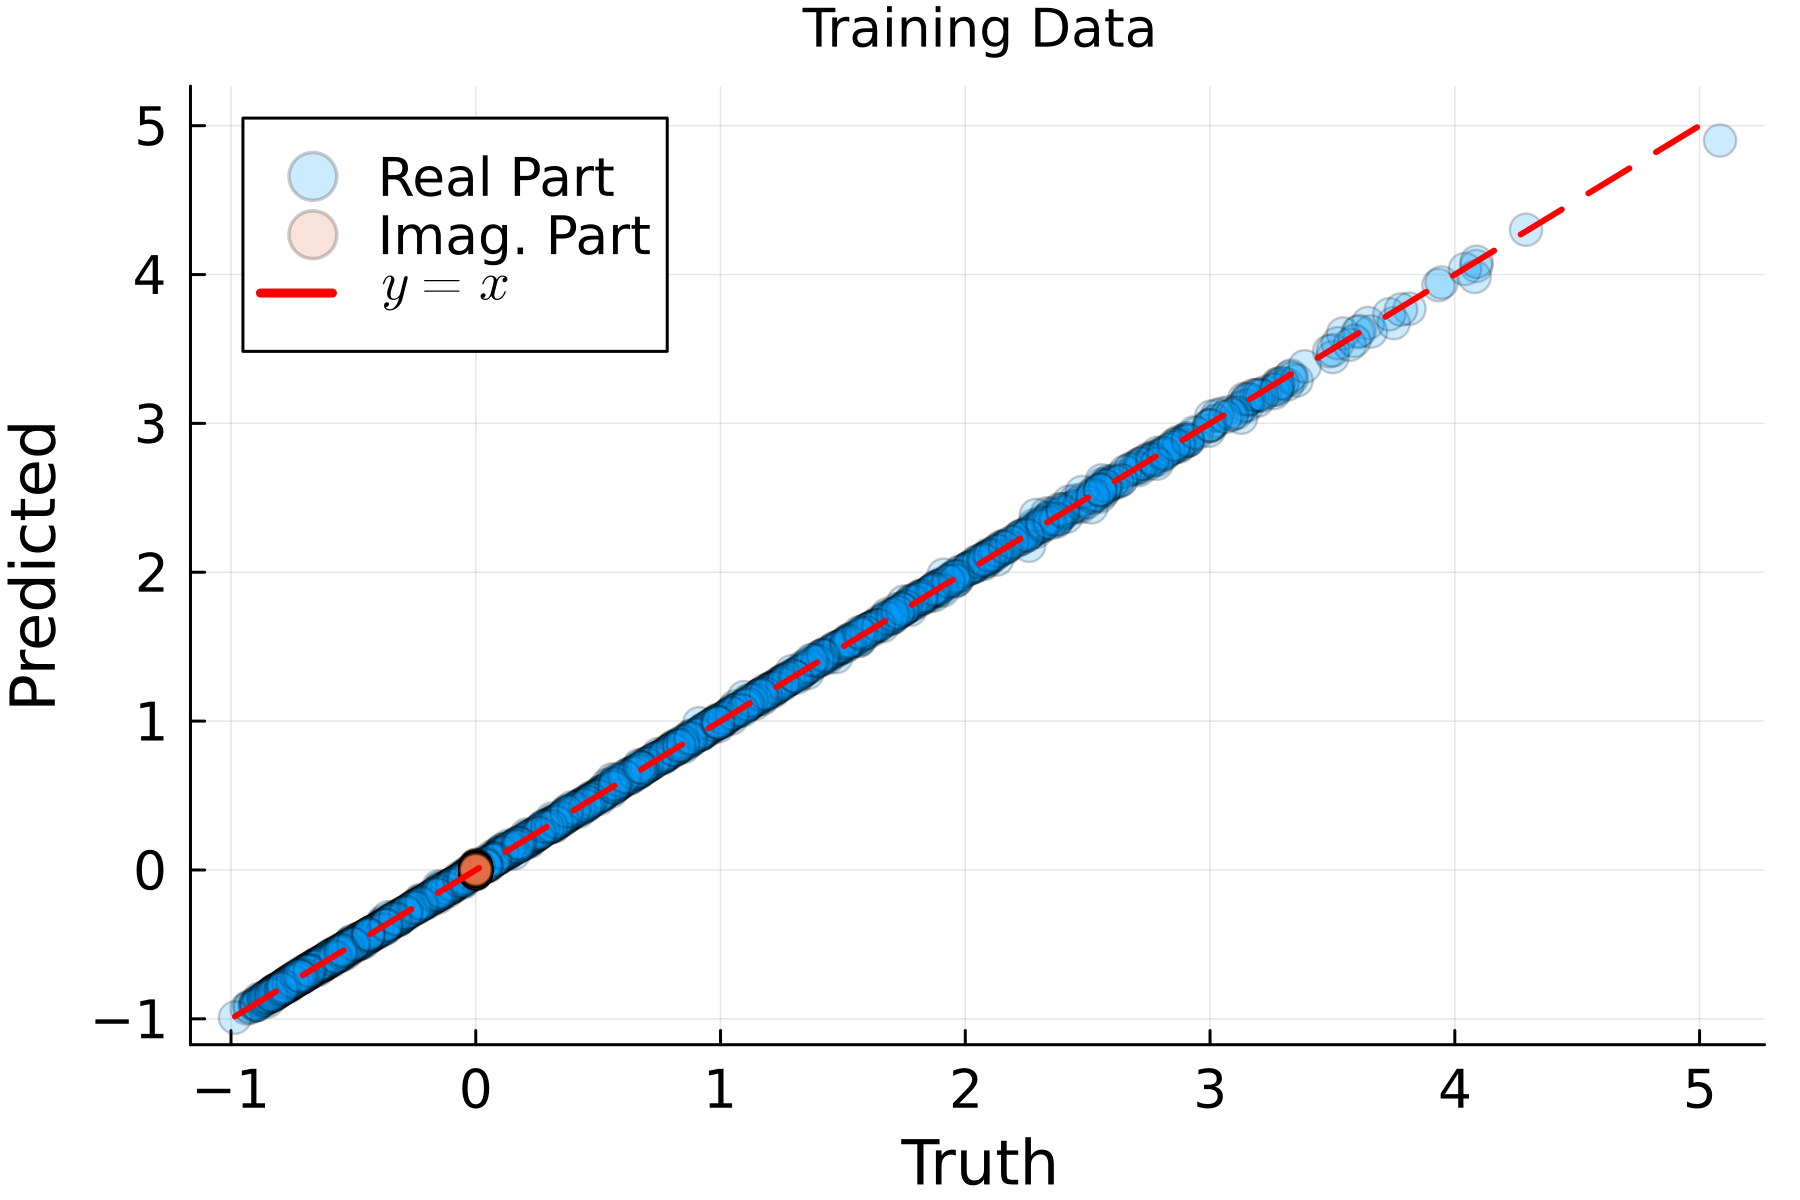

In [21]:
# Training Accuracy Plotting
xx = LinRange(minimum(real.(data_train.y)), maximum(real.(data_train.y)),100);

train_truth = scatter(real.(data_train.y), real.(F.(data_train.x)), alpha=0.2, label= "Real Part",dpi=300)
scatter!(imag.(data_train.y), imag.(F.(data_train.x)), alpha=0.2, label= "Imag. Part")
plot!(xx, xx, label=L"y=x",ls=:dash, color=:red)
xlabel!("Truth")
ylabel!("Predicted")
title!("Training Data")
#savefig(train_truth,"Train_Accuracy")



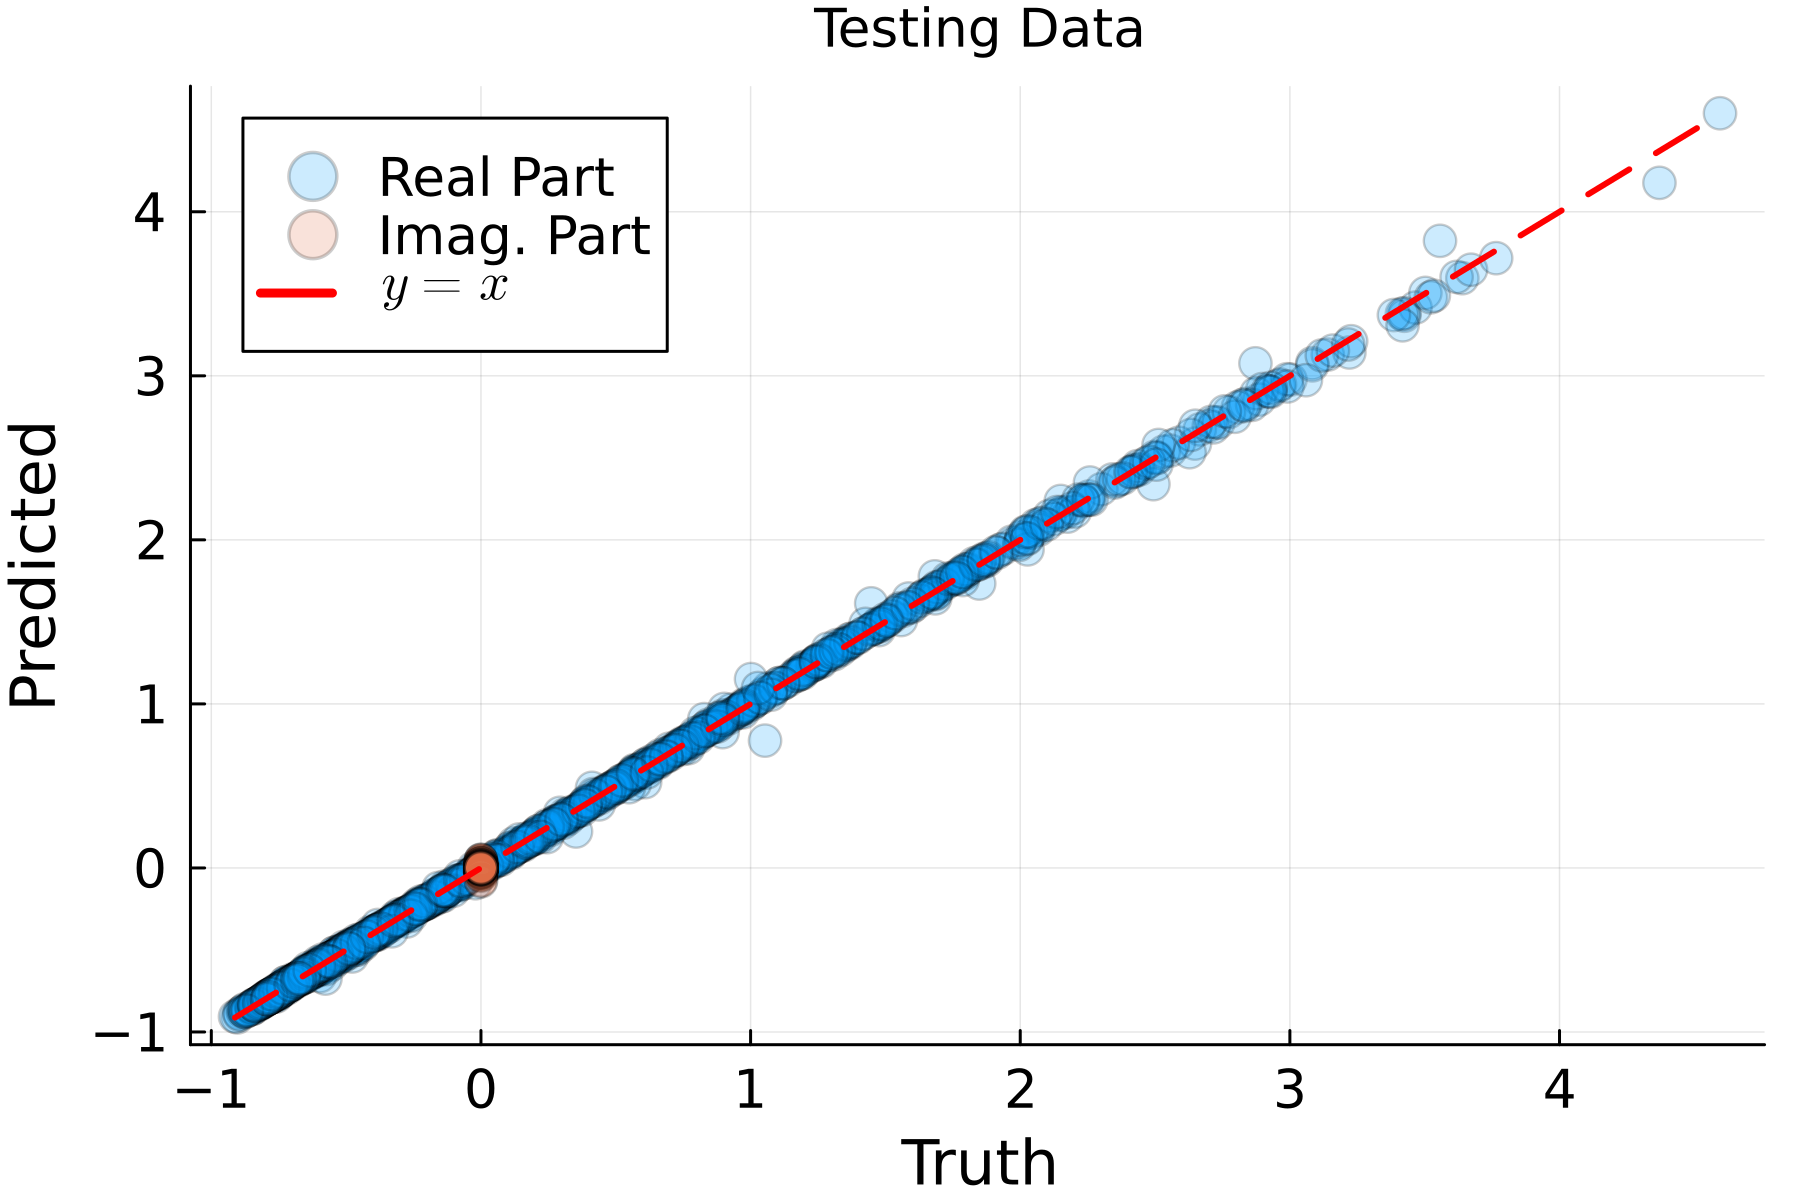

In [22]:
# Testing accuracy Plotting
xx = LinRange(minimum(real.(data_test.y)), maximum(real.(data_test.y)),100);

test_truth = scatter(real.(data_test.y), real.(F.(data_test.x)), alpha=0.2, label= "Real Part",dpi=300)
scatter!(imag.(data_test.y), imag.(F.(data_test.x)), alpha=0.2, label= "Imag. Part")
plot!(xx, xx, label=L"y=x",ls=:dash, color=:red)
xlabel!("Truth")
ylabel!("Predicted")
title!("Testing Data")
#savefig(test_truth,"Test_Accuracy")

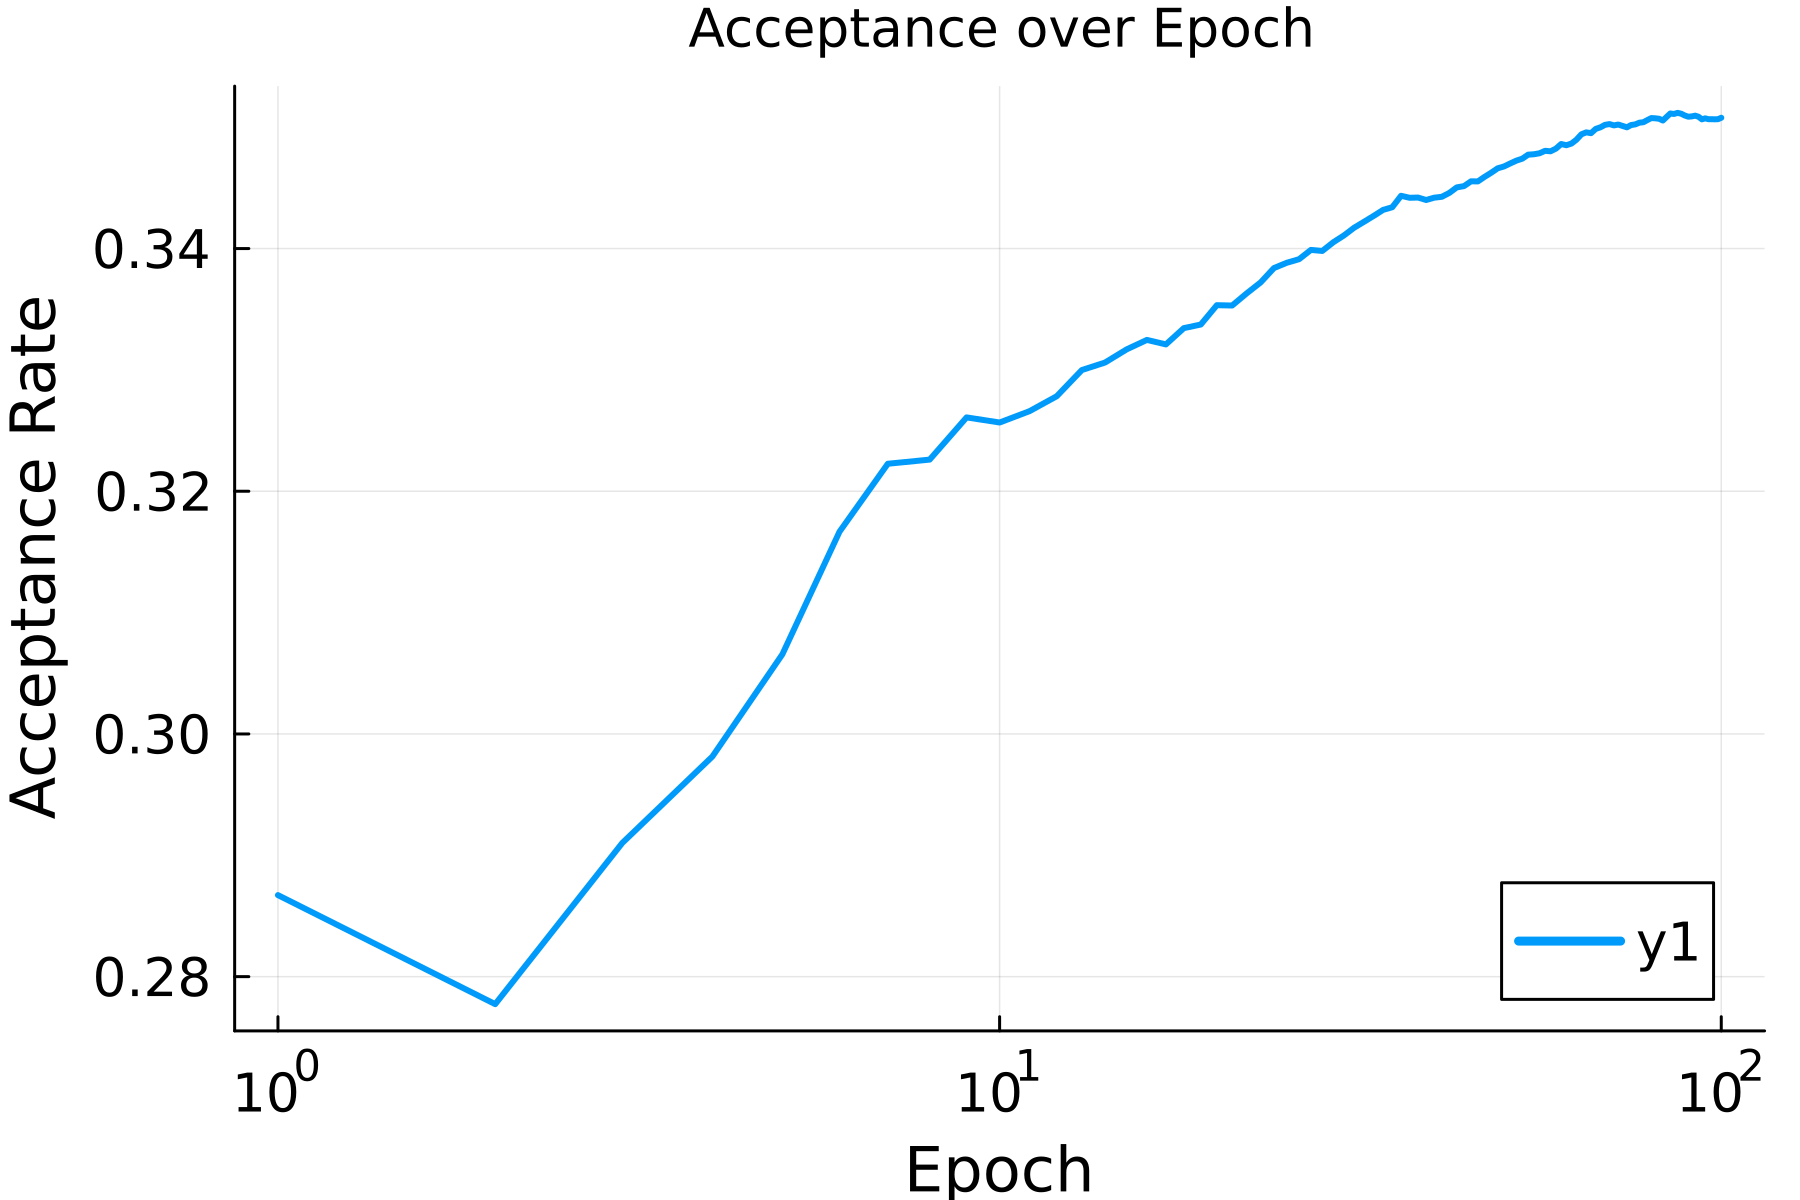

In [23]:
# acceptance rate (should be  >75 or <15 for nearly all)
acc = plot(1:length(acceptance), acceptance, xscale=:log10,dpi=300)
title!("Acceptance over Epoch")
xlabel!("Epoch")
ylabel!("Acceptance Rate")
#savefig(acc,"acceptance")

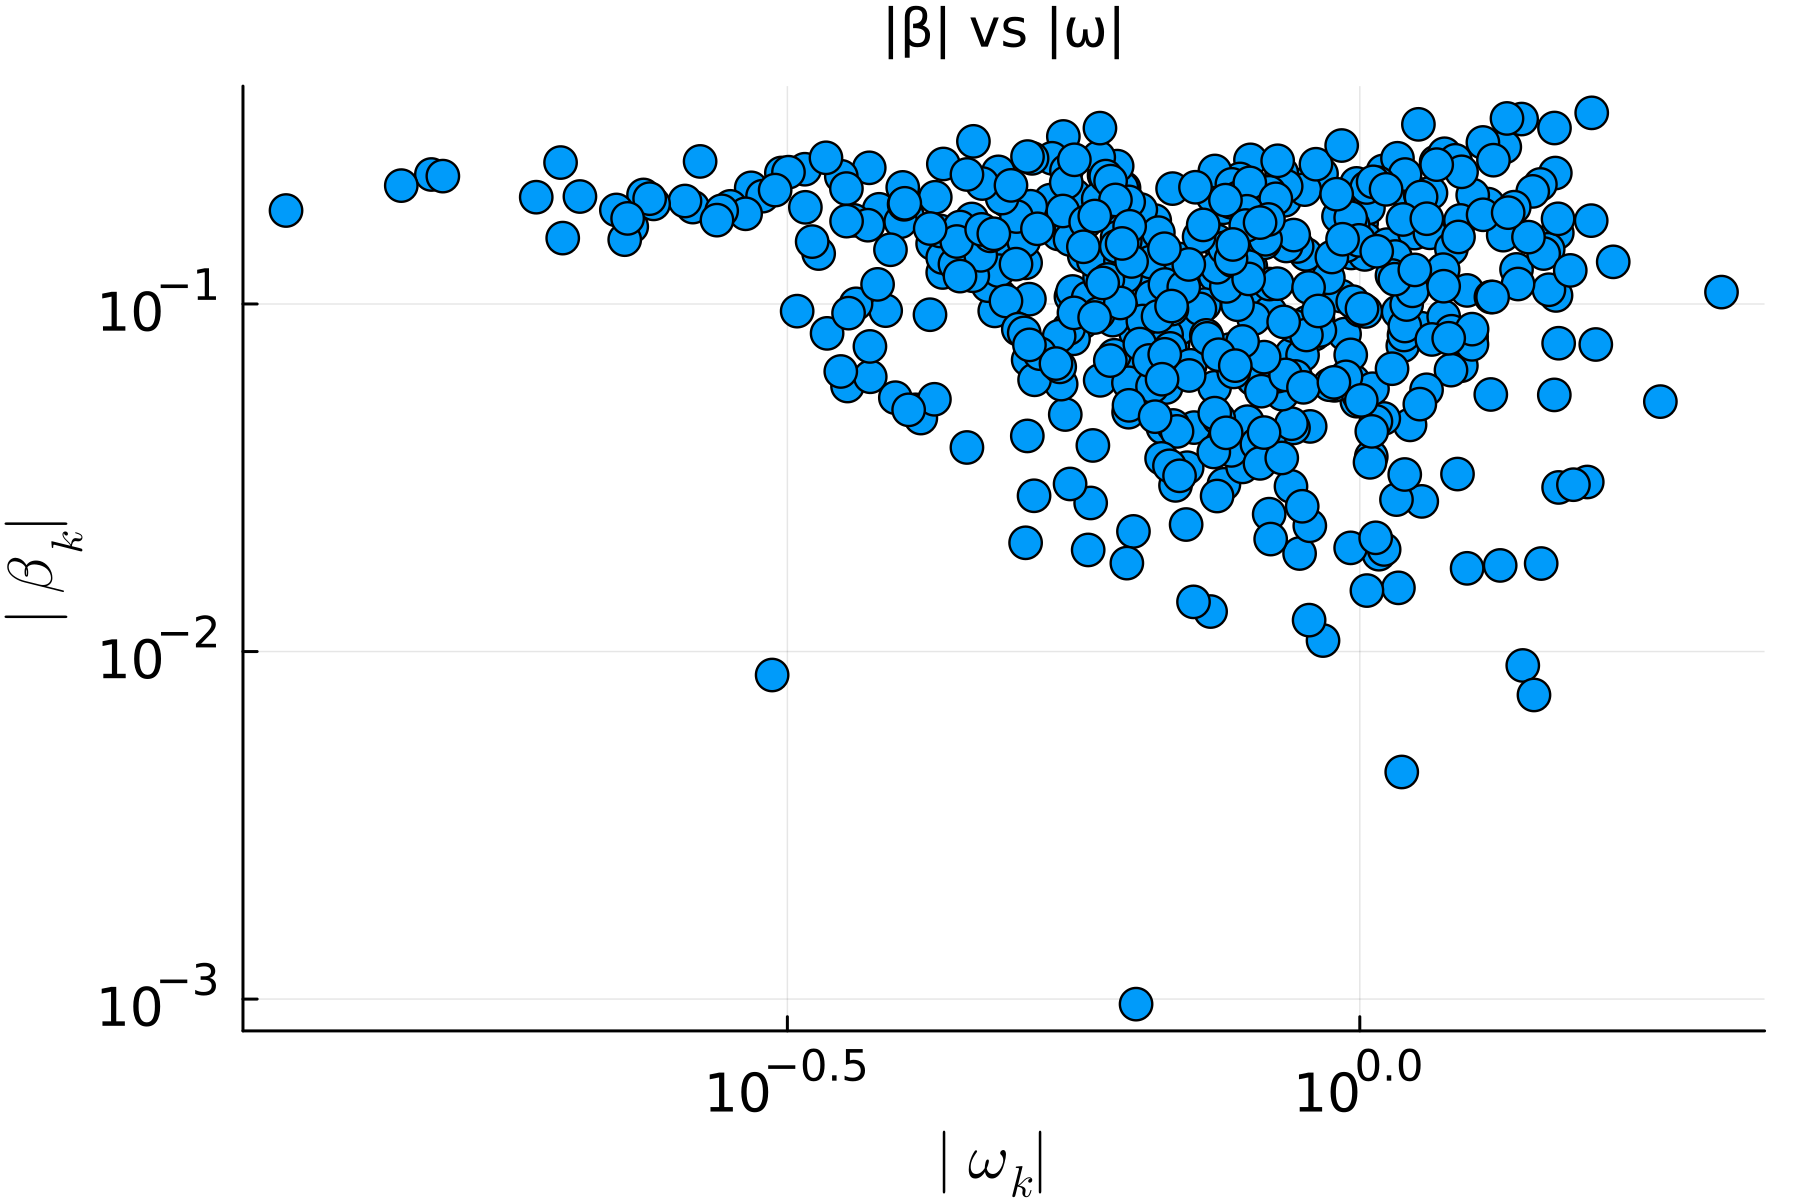

In [24]:
# Omega vs Beta plotting
    # Only can tell if something is really wrong otherwise just pretty
OvB = scatter(norm.(F.ω), abs.(F.β),label="", xscale=:log10, yscale=:log10,dpi=300)
title!("|β| vs |ω|")
xlabel!(L"\|\omega_k\|")
ylabel!(L"\|\beta_k\|")
#savefig(OvB,"omega_beta")